In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import pickle
import operator
from wordcloud import WordCloud
from PIL import Image
import string
import re

In [2]:
eng_stop=stopwords.words('english')

In [3]:
eng_stop[0:5]

['i', 'me', 'my', 'myself', 'we']

In [4]:
df=pd.read_pickle('song_lyric_df.pkl')

In [5]:
df.head()

,song,lyrics
0,1822,"[[Speech], John: This is a Dorsey Burnette num..."
1,a day in the life,"[I read the news today oh, boy, About a lucky ..."
2,a hard days night,"[It's been a hard day's night, and I've been w..."
3,a little rhyme,"[[Speech], Rodney Burke: Now, for the final nu..."
4,a shot of rhythm blues,"[Well, if your hands start a-clapping, And you..."


In [6]:
df['speech_check']=df.lyrics.apply(lambda x: x[0])

In [7]:
df.head()

,song,lyrics,speech_check
0,1822,"[[Speech], John: This is a Dorsey Burnette num...",[Speech]
1,a day in the life,"[I read the news today oh, boy, About a lucky ...","I read the news today oh, boy"
2,a hard days night,"[It's been a hard day's night, and I've been w...","It's been a hard day's night, and I've been wo..."
3,a little rhyme,"[[Speech], Rodney Burke: Now, for the final nu...",[Speech]
4,a shot of rhythm blues,"[Well, if your hands start a-clapping, And you...","Well, if your hands start a-clapping"


In [8]:
df[df.speech_check=='[Speech]']

,song,lyrics,speech_check
0,1822,"[[Speech], John: This is a Dorsey Burnette num...",[Speech]
3,a little rhyme,"[[Speech], Rodney Burke: Now, for the final nu...",[Speech]
27,beatle greetings,"[[Speech], Ringo: I'm Ringo and I play the dru...",[Speech]
49,crinsk dee night,"[[Speech], Brian Matthew: The next few minutes...",[Speech]
54,dear wack,"[[Speech], Brian Matthew: But despite the fact...",[Speech]
94,have a banana,"[[Speech], Brian Matthew: Is that it? Is that ...",[Speech]
153,just a rumour,"[[Speech], Alan Freeman: George, is it true th...",[Speech]
169,love these goon shows,"[[Speech], Lee Peters: But now, John has his w...",[Speech]


In [9]:
len(df[df.speech_check=='[Speech]'])

8

In [10]:
df=df[df.speech_check!='[Speech]']

In [11]:
df.drop('speech_check',axis=1,inplace=True)

In [12]:
df.reset_index(inplace=True)

In [13]:
df.drop('index',axis=1,inplace=True)

In [14]:
df.head()

,song,lyrics
0,a day in the life,"[I read the news today oh, boy, About a lucky ..."
1,a hard days night,"[It's been a hard day's night, and I've been w..."
2,a shot of rhythm blues,"[Well, if your hands start a-clapping, And you..."
3,a taste of honey,"[A taste of honey., Tasting much sweeter than ..."
4,across the universe,[Words are flowing out like endless rain into ...


In [16]:
df['lyrics_mush']=df.lyrics.apply(lambda x: ' '.join(x))

In [18]:
df.head()

,song,lyrics,lyrics_mush
0,a day in the life,"[I read the news today oh, boy, About a lucky ...","I read the news today oh, boy About a lucky ma..."
1,a hard days night,"[It's been a hard day's night, and I've been w...","It's been a hard day's night, and I've been wo..."
2,a shot of rhythm blues,"[Well, if your hands start a-clapping, And you...","Well, if your hands start a-clapping And your ..."
3,a taste of honey,"[A taste of honey., Tasting much sweeter than ...",A taste of honey. Tasting much sweeter than wi...
4,across the universe,[Words are flowing out like endless rain into ...,Words are flowing out like endless rain into a...


In [19]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [20]:
df.head()

,song,lyrics,lyrics_mush
0,a day in the life,"[I read the news today oh, boy, About a lucky ...","I read the news today oh, boy About a lucky ma..."
1,a hard days night,"[It's been a hard day's night, and I've been w...","It's been a hard day's night, and I've been wo..."
2,a shot of rhythm blues,"[Well, if your hands start a-clapping, And you...","Well, if your hands start a-clapping And your ..."
3,a taste of honey,"[A taste of honey., Tasting much sweeter than ...",A taste of honey. Tasting much sweeter than wi...
4,across the universe,[Words are flowing out like endless rain into ...,Words are flowing out like endless rain into a...


In [22]:
df['clean_lyrics']=df.lyrics_mush.apply(lambda x: clean_text(x))

In [24]:
df.drop('lyrics_mush',axis=1,inplace=True)

In [25]:
df.head()

,song,lyrics,clean_lyrics
0,a day in the life,"[I read the news today oh, boy, About a lucky ...",i read the news today oh boy about a lucky man...
1,a hard days night,"[It's been a hard day's night, and I've been w...",its been a hard days night and ive been workin...
2,a shot of rhythm blues,"[Well, if your hands start a-clapping, And you...",well if your hands start aclapping and your fi...
3,a taste of honey,"[A taste of honey., Tasting much sweeter than ...",a taste of honey tasting much sweeter than win...
4,across the universe,[Words are flowing out like endless rain into ...,words are flowing out like endless rain into a...


In [26]:
len(df)

192

In [27]:
every_lyrics=[]
for i in range(len(df)):
    every_lyrics.append(df.clean_lyrics[i])

In [31]:
every_lyrics[0:2]

['i read the news today oh boy about a lucky man who made the grade and though the news was rather sad well i just had to laugh i saw the photograph he blew his mind out in a car he didnt notice that the lights had changed a crowd of people stood and stared theyd seen his face before nobody was really sure if he was from the house of lords i saw a film today oh boy the english army had just won the war a crowd of people turned away but i just had to look having read the book id love to turn you on woke up fell out of bed dragged a comb across my head found my way downstairs and drank a cup and looking up i noticed i was late found my coat and grabbed my hat made the bus in seconds flat found my way upstairs and had a smoke and somebody spoke and i went into a dream ah i read the news today oh boy four thousand holes in blackburn lancashire and though the holes were rather small they had to count them all now they know how many holes it takes to fill the albert hall id love to turn you 

In [42]:
btls_ltr_cnt={}
for song in every_lyrics:
    for line in song:
        for word in line.split():
            if word not in btls_ltr_cnt.keys():
                btls_ltr_cnt[word]=1
            else:
                btls_ltr_cnt[word]+=1

In [51]:
btls_wrd_cnt={}
for lyric in every_lyrics:
    for word in lyric.split():
        if word not in btls_wrd_cnt:
            btls_wrd_cnt[word]=1
        else:
            btls_wrd_cnt[word]+=1

In [53]:
sorted_words = sorted(btls_wrd_cnt.items(), key=operator.itemgetter(1))
sorted_words[0:5]

[('grade', 1), ('photograph', 1), ('notice', 1), ('lights', 1), ('stood', 1)]

In [54]:
sorted_words[::-1][0:5]

[('you', 1451), ('i', 1235), ('the', 865), ('me', 718), ('to', 714)]

In [55]:
sorted_words=sorted_words[::-1]

In [56]:
sorted_words[0:5]

[('you', 1451), ('i', 1235), ('the', 865), ('me', 718), ('to', 714)]

In [57]:
new_sorts=[]
for word in sorted_words:
    if word[0] not in eng_stop:
        new_sorts.append(word)

In [58]:
new_sorts[0:10]

[('love', 367),
 ('im', 333),
 ('dont', 251),
 ('oh', 245),
 ('know', 213),
 ('baby', 205),
 ('yeah', 171),
 ('well', 171),
 ('want', 157),
 ('got', 147)]

In [59]:
btls_wrds_dict=dict(new_sorts)

In [60]:
len(string.punctuation)

32

In [61]:
punct=[]
for i in range(0,32):
    punct.append(string.punctuation[i])

In [62]:
punct[0:5]

['!', '"', '#', '$', '%']

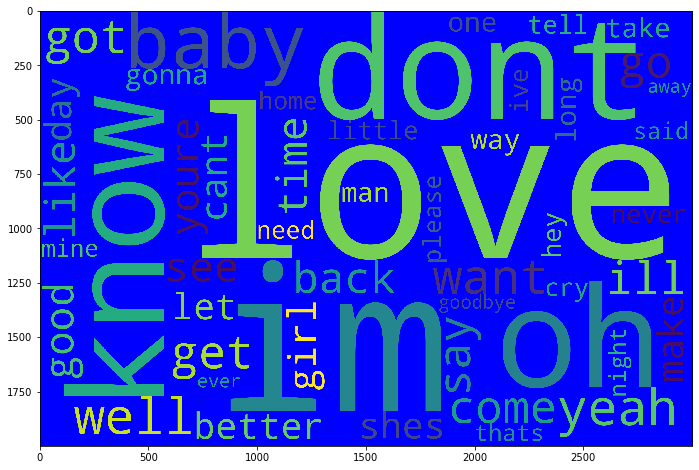

In [63]:
plt.figure(figsize=(15,8))
wc = WordCloud(background_color="blue",width=3000,height=2000, max_words=50,normalize_plurals=True).generate_from_frequencies(btls_wrds_dict)
plt.tight_layout()
plt.imshow(wc)

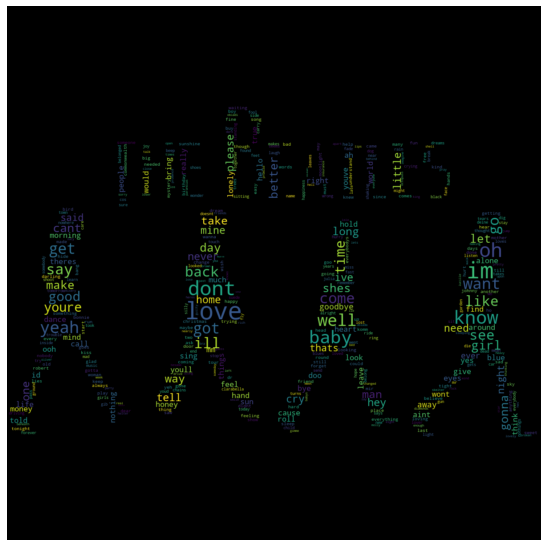

In [116]:
plt.figure(figsize=(15,8))
mask = np.array(Image.open('/Users/josephcohen/Downloads/abby.png'))
wc = WordCloud(stopwords=eng_stop, 
               mask=mask, background_color="black",
               max_words=400, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0]).generate_from_frequencies(btls_wrds_dict)
plt.imshow(wc, interpolation="bilinear")
plt.tight_layout()
plt.axis('off')
plt.show()

In [117]:
def one_color_func(word=None, font_size=None, 
                   position=None, orientation=None, 
                   font_path=None, random_state=None):
    h = 1260 # 0 - 360
    s = 100 # 0 - 100
    l = 50 # 0 - 100

    return "hsl({}, {}%, {}%)".format(h, s, l)

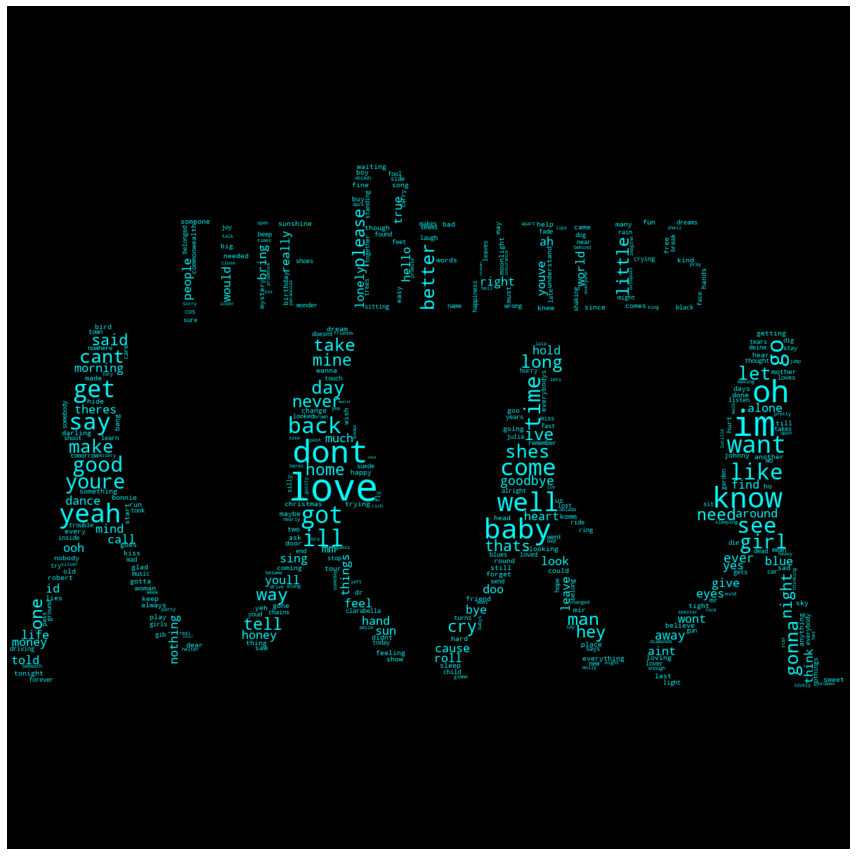

In [131]:
plt.figure(figsize=(14,12))
plt.imshow(wc.recolor(color_func=one_color_func), interpolation="bilinear")
plt.axis("off")
plt.tight_layout()

In [133]:
# remove punctuation from words in word cloud

In [ ]:
# big thanks to this guy: https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32